# Google Colal 데이터 로드

In [ ]:
#Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
src_data = pd.read_csv(io.BytesIO(myfile['수박과참외.csv']),
                       encoding='cp949')
src_data

# 로컬 데이터 로드

In [2]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
src_data = pd.read_csv('../../머신러닝실습용자료/수박과참외.csv',encoding='cp949')
src_data

,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,900,10.0
5,수박,2500,33.0
6,수박,2250,23.0
7,수박,1860,17.0
8,수박,2100,21.0
9,수박,1500,17.0


# 공통 실습 코드

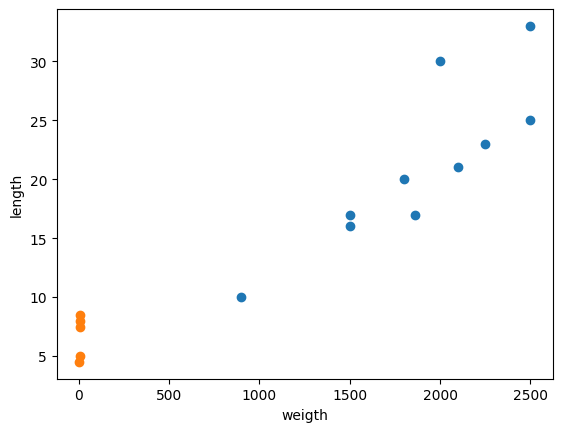

In [5]:
#수박과 참외의 무게와 길이
수박정보 = src_data.loc[ (src_data['종류'] =='수박'), ['무게','길이']]
참외정보 = src_data.loc[ (src_data['종류'] =='참외'), ['무게','길이']]

import matplotlib.pyplot as plt
plt.scatter(수박정보.무게,수박정보.길이)  # 파란색
plt.scatter(참외정보.길이,참외정보.길이)  # 주황색
plt.xlabel('weigth')
plt.ylabel('length')
plt.show()

In [4]:
import numpy as np

# np.column_stack을 통해 무게와 길이를 data 변수에 넣는다. 
data = np.column_stack( (src_data.무게, src_data.길이) )

# 데이터의 종류를 target에 넣는다.
target = src_data.종류
print(data)
print(target)

[[2000.    30. ]
 [2500.    25. ]
 [1800.    20. ]
 [1500.    16. ]
 [ 900.    10. ]
 [2500.    33. ]
 [2250.    23. ]
 [1860.    17. ]
 [2100.    21. ]
 [1500.    17. ]
 [ 500.     8. ]
 [ 400.     7.5]
 [ 450.     5. ]
 [ 400.     4.5]
 [ 600.     8.5]]
0     수박
1     수박
2     수박
3     수박
4     수박
5     수박
6     수박
7     수박
8     수박
9     수박
10    참외
11    참외
12    참외
13    참외
14    참외
Name: 종류, dtype: object


In [6]:
# Step 4. 주어진 데이터를 훈련용과 테스트(검증용)으로 나눕니다.
from sklearn.model_selection import train_test_split
훈련용_data , 테스트용_data , 훈련용_target , 테스트용_target = train_test_split(
    data , target , random_state=40 )

In [5]:
# 데이터 구조(shape) 확인
print(훈련용_data.shape , 테스트용_data.shape)

(11, 2) (4, 2)


In [6]:
# Step 5. 분석하여 모델을 생성합니다.
from sklearn.neighbors import KNeighborsClassifier
# knn 모델 생성
knn = KNeighborsClassifier(n_neighbors=3)

# 모델 학습
knn.fit(훈련용_data , 훈련용_target) # 훈련하는 명령(학습시키는 명령)- 모델생성

# 모델 평가
knn.score(테스트용_data , 테스트용_target) #모의고사 

1.0

In [7]:
# Step 6. 모델이 정확한지 임의의 데이터로 테스트합니다.
print( knn.predict([[1000, 15]]))

['수박']


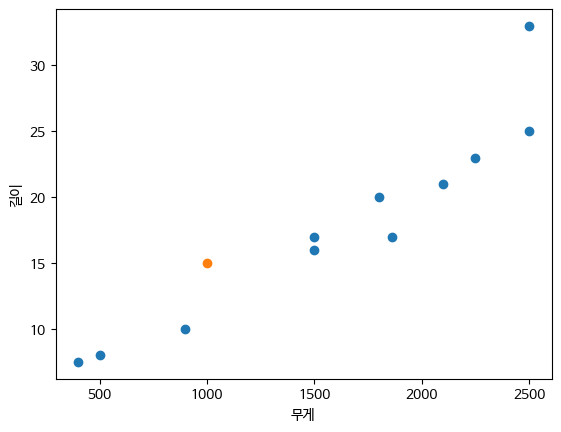

In [8]:
# Step 7. 위 데이터의 값을 그래프로 출력하여 확인합니다. - 구글코랩용 코드
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

plt.scatter(훈련용_data[:,0], 훈련용_data[:,1])
plt.scatter(1000, 15, marker='o')
plt.xlabel('무게')
plt.ylabel('길이')
plt.show()

In [ ]:
# Step 7. 위 데이터의 값을 그래프로 출력하여 확인합니다. - 로컬 노트북용 코드
# 코랩이 아닌 노트북에서 실행할 경우 아래 내용을 실행하면 됩니다
from matplotlib import pyplot as plt 
import matplotlib.font_manager as fm
import matplotlib

font_location = "c:\windows\Fonts\HYCYSM.TTF"
# 혹시 위 폰트가 에러날 경우 C:\\Windows\\Fonts\\malgun.ttf" 폰트 사용하면 됩니다
font_location = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)

plt.scatter(훈련용_data[:,0], 훈련용_data[:,1])
plt.scatter(1000, 15, marker='o')
plt.xlabel('무게')
plt.ylabel('길이')
plt.show()

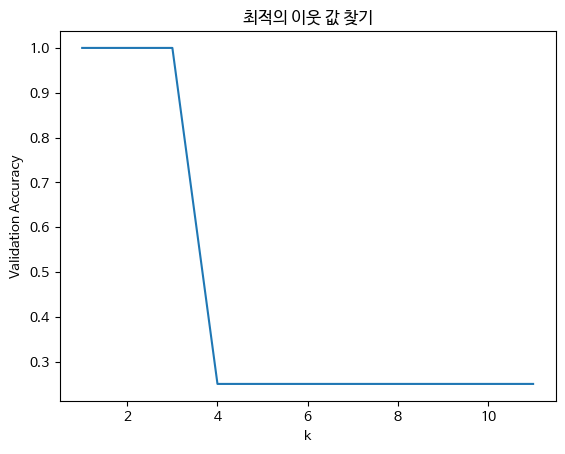

In [9]:
# Step 8. 최적의 k 값 찾기 - 구글 코랩용 코드
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

k_list = range(1,12)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(훈련용_data, 훈련용_target.values.ravel())
  accuracies.append(classifier.score(테스트용_data, 테스트용_target))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("최적의 이웃 값 찾기")
plt.show()

In [ ]:
# Step 8. 최적의 k 값 찾기 - 로컬 컴퓨터용 코드
from matplotlib import pyplot as plt 
import matplotlib.font_manager as fm
import matplotlib

#font_location = "c:\windows\Fonts\HYCYSM.TTF"
font_location = 'C:\\Windows\\Fonts\\malgun.ttf'
# 혹시 위 폰트가 에러날 경우 C:\\Windows\\Fonts\\malgun.ttf" 폰트 사용하면 됩니다

font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)


k_list = range(1,12)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(훈련용_data, 훈련용_target.values.ravel())
  accuracies.append(classifier.score(테스트용_data, 테스트용_target))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("최적의 이웃 값 찾기")
plt.show()

In [ ]:
# Step 5. 분석하여 모델을 생성합니다.
from sklearn.neighbors import KNeighborsClassifier
# knn 모델 생성
knn = KNeighborsClassifier(n_neighbors=3)

# 모델 학습
knn.fit(훈련용_data , 훈련용_target) # 훈련하는 명령(학습시키는 명령)- 모델생성

# 모델 평가
knn.score(테스트용_data , 테스트용_target) #모의고사 

In [ ]:
# 학습된 모델 저장하기와 불러서 재사용하기
import joblib
from google.colab import files

# 모델을 훈련합니다.
model = kn.fit(훈련데이터_표준점수, 훈련용_target)

# 모델을 피클 파일로 저장합니다.
joblib.dump(model, "KNN_model.pkl")
files.download('KNN_model.pkl')

In [ ]:
# 모델을 불러서 다시 사용하기
kn2 = joblib.load("KNN_model.pkl")
kn2.predict([[800,8]])